# Problem Transformation

This notebook discusses Multi-label algorithm probelm transformation methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Data import](#data_import)
* [Methods](#methods)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from joblib import dump, load
from pathlib import Path
from academia_tag_recommender.definitions import MODELS_PATH
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

DATA_FOLDER = Path(MODELS_PATH) / 'classifier' / 'multi-label'
RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')

X = get_X_reduced(preprocessing)
y = get_y()
X_train, X_test, y_train, y_test = get_test_train_data(X, y)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<a id='methods'/>

## Methods

Algorithms in scikit-learn suited for Multi-label problem transformation:
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)
- [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
- [RidgeClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV)

Multi-label suport can be added to all Classifiers using.
- [MultioutputClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)

sklearn-multilabel:
- [Classifier Chain](http://scikit.ml/api/skmultilearn.problem_transform.cc.html#skmultilearn.problem_transform.ClassifierChain)
- [Label Powerset](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

In [3]:
clf_paths = []
def create_classifier(classifier, name=False):
    clf = Classifier(classifier, preprocessing, name)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    path = clf.save('problem_transformation')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()
    clf_paths.append(path)

**DecisionTreeClassifier**

In [4]:
from sklearn.tree import DecisionTreeClassifier

create_classifier(DecisionTreeClassifier(random_state=RANDOM_STATE), 'DecisionTreeClassifier')

Training: 5157.041726589203s
Test: 0.22439789772033691s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.021073633297269776     0.01124546553808948      0.22622934300685205      0.2187464731962918       0.20270148365674365      
micro                                                            0.21109369805765305      0.21221235558101786      0.21165154869890246      
macro                                                            0.09316818545880633      0.09407338455191613      0.09322556858667545      


**ExtraTreeClassifier**

In [5]:
from sklearn.tree import ExtraTreeClassifier

create_classifier(ExtraTreeClassifier(random_state=RANDOM_STATE), 'ExtraTreeClassifier')

Training: 9.968309879302979s
Test: 0.1949443817138672s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.02454273531470757      0.0037484885126964932    0.09396815800080613      0.09051390568319227      0.08419838390817834      
micro                                                            0.08901744891294205      0.09109137782870237      0.09004247286455876      
macro                                                            0.037857593288502585     0.038913712570931604     0.03808756453512767      


**KNeighborsClassifier**

In [6]:
from sklearn.neighbors import KNeighborsClassifier

create_classifier(KNeighborsClassifier(), 'KNeighborsClassifier')

Training: 50.60759139060974s
Test: 2169.930188894272s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013444281804874945     0.0403869407496977       0.05108827085852479      0.02569125352680371      0.03232106869349916      
micro                                                            0.42447257383966247      0.02401413157643464      0.045456599340291906     
macro                                                            0.2829815402946036       0.02537771232785004      0.039906697841395465     


**RadiusNeighborsClassifier**

In [7]:
from sklearn.neighbors import RadiusNeighborsClassifier

create_classifier(RadiusNeighborsClassifier(outlier_label='most_frequent'), 'RadiusNeighborsClassifier')

Training: 51.6987509727478s
Test: 2129.0265130996704s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013330363393368549     0.039419588875453444     0.0                      0.0                      0.0                      
micro                                                            0.0                      0.0                      0.0                      
macro                                                            0.0                      0.0                      0.0                      


**MLPClassifier**

In [8]:
from sklearn.neural_network import MLPClassifier

create_classifier(MLPClassifier(random_state=RANDOM_STATE), 'MLPClassifier')

Training: 560.7325749397278s
Test: 0.31615424156188965s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014173614204798575     0.05211608222490931      0.3856041150841634       0.2997279322853688       0.31015237885854574      
micro                                                            0.4513404333455747       0.29337343645564784      0.3556031364833193       
macro                                                            0.44769010623993016      0.1950486469109478       0.2594623860166471       


**RidgeClassifierCV**

*TODO: implementation needs to be adjusted for different prediction format: `[125 278 302 ...  80  64 158]`*

In [9]:
from sklearn.linear_model import RidgeClassifierCV

#create_classifier(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))

**MultioutputClassifier**

MultiouputClassifier transforms sklearn classifier into classifiers capable of Binary Relevence.

In [10]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

create_classifier(MultiOutputClassifier(LinearSVC(random_state=RANDOM_STATE)), 'MultioutputClassifier(LinearSVC)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Training: 2004.9412786960602s
Test: 15.422645092010498s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016360974988862725     0.03857315598548972      0.3703249457783919       0.34679766223297054      0.3275619382632684       
micro                                                            0.3750524769101595       0.34121073235940036      0.3573321333933303       
macro                                                            0.45606361506182375      0.24969588385802216      0.30470266656193         


In [11]:
from sklearn.linear_model import LogisticRegression

create_classifier(MultiOutputClassifier(LogisticRegression(random_state=RANDOM_STATE)), 'MultioutputClassifier(LogisticRegression)')

Training: 804.097718000412s
Test: 15.942527055740356s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013152803411188189     0.0633615477629988       0.4242845626763402       0.29961104393389765      0.3246216178017871       
micro                                                            0.5116746171227717       0.29189344027499287      0.3717282261741906       
macro                                                            0.5573365597161809       0.18069715131874634      0.25364457923518974      


**Classwise Classifier**

In [12]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

scorer = make_scorer(accuracy_score)

In [13]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption

classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]}),
                      ClassifierOption(LogisticRegressionCV(Cs=[0.1, 0.5, 1, 5, 10], random_state=RANDOM_STATE, max_iter=2000, scoring=scorer))]
                      #ClassifierOption(RandomForestClassifier(random_state=RANDOM_STATE))]

create_classifier(ClasswiseClassifier(classifier_options), 'ClasswiseClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Training: 31562.296799898148s
Test: 17.277340412139893s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011811239101381023     0.08319226118500604      0.42446795646916563      0.25059250302297464      0.29414896067253987      
micro                                                            0.6554643741044679       0.2402367993889048       0.3516053523390281       
macro                                                            0.5305995314090245       0.17442807533911683      0.24213089496494786      


**Classifier Chain**

<cite>[Read et al., 2011][1]</cite>

[1]: https://doi.org/10.1007/s10994-011-5256-5

In [14]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import LinearSVC

create_classifier(ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)), 'ClassifierChain(LinearSVC)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training: 2613.802140712738s
Test: 81.65234613418579s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016203143893591294     0.036517533252720676     0.3717736223872863       0.34415961305925036      0.32806801823730486      
micro                                                            0.3790590504769049       0.33772558006301917      0.3572005655423146       
macro                                                            0.46494360004378105      0.24796132318742514      0.30526001393188273      


In [4]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
create_classifier(ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'ClassifierChain(LogisticRegression)')

Training: 1704.0577557086945s
Test: 99.8096375465393s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013158531152548844     0.06590084643288996      0.42641619162779987      0.30327690447400246      0.3280978292163298       
micro                                                            0.5110675488033979       0.2987062586527904       0.3770412774932209       
macro                                                            0.5623715016423522       0.18749398022363278      0.26242890247276174      


**Label Powerset**

In [16]:
from skmultilearn.problem_transform import LabelPowerset

create_classifier(LabelPowerset(classifier=LinearSVC(random_state=RANDOM_STATE)), 'LabelPowerset(LinearSVC)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training: 49965.967564344406s
Test: 21.328294038772583s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.019318398778081843     0.030229746070133012     0.2920354695687223       0.21335147118097542      0.22482044490508823      
micro                                                            0.23903034337382814      0.20571946911104746      0.22112744720704078      
macro                                                            0.18758316049315527      0.15340804240773304      0.16369340713744313      


In [ ]:
# Does not finish
#create_classifier(LabelPowerset(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'LabelPowerset(LogisticRegression)')

### Evaluation

In [5]:
paths = available_classifier_paths('problem_transformation')
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    evals.append([str(clf), evaluation])

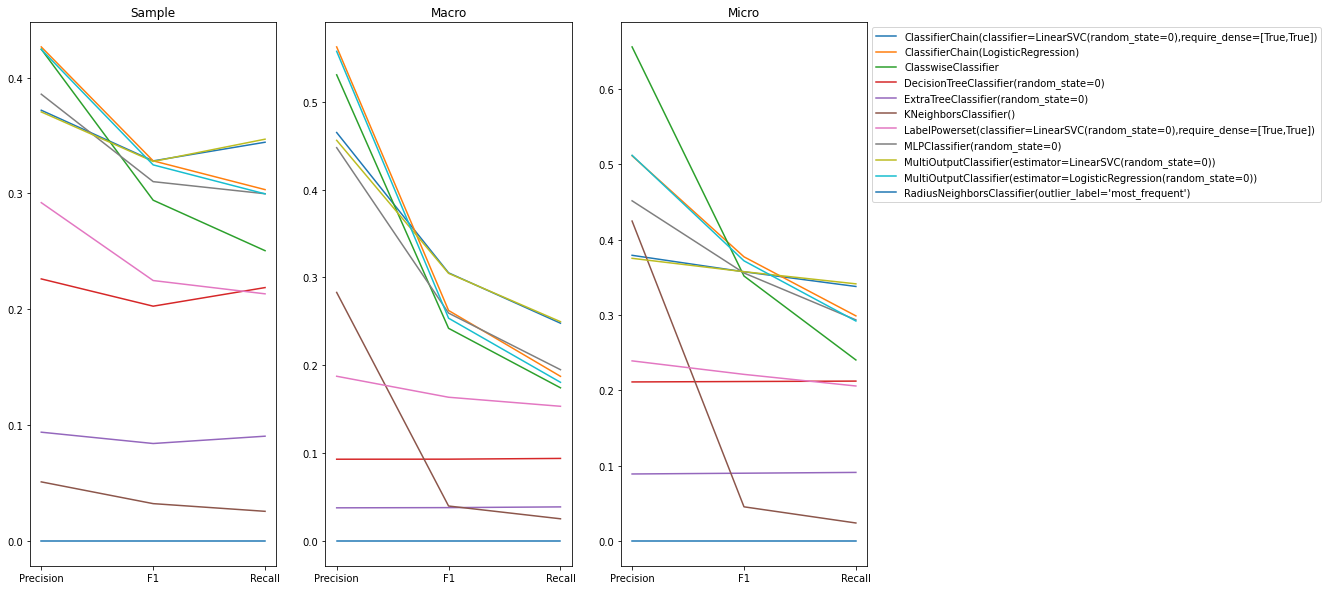

In [6]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [7]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.sum(), reverse=True)[:3]

In [8]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    classwise_results.append((clf, classification_report(y_test, prediction, output_dict=True, zero_division=0)))

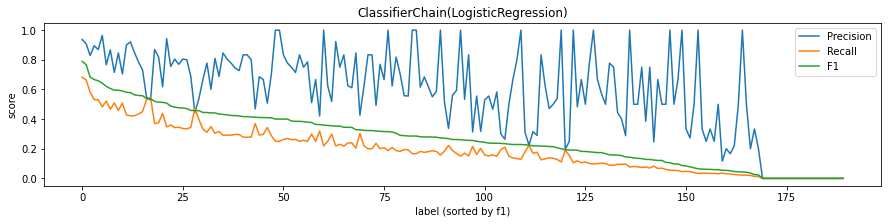

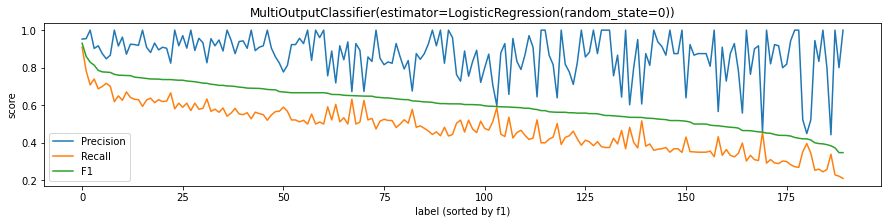

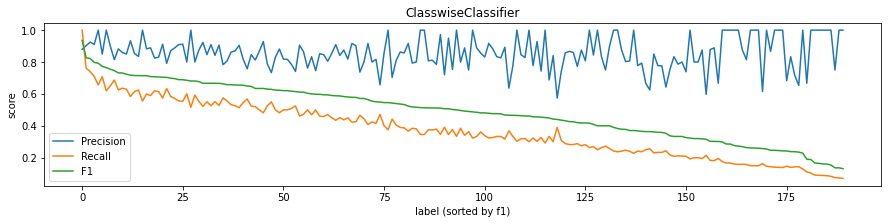

In [9]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['f1-score'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.set_xlabel('label (sorted by f1)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()